In [19]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_theme(style="whitegrid")

print("--- Starting COVID‑19 Data Analysis ---")


--- Starting COVID‑19 Data Analysis ---



--- Analyzing 'covid_19_data.csv' ---
Successfully loaded 'covid_19_data.csv'


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


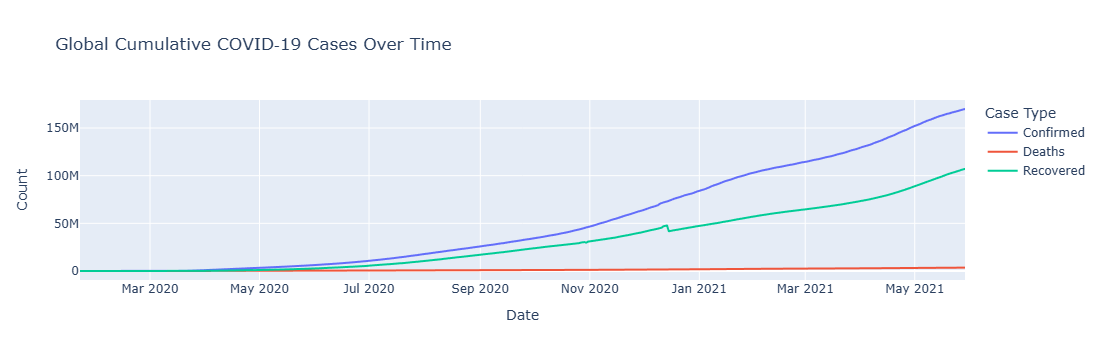

C:\Users\jyoth\AppData\Local\Temp\ipykernel_22712\21204367.py:37: UserWarning:

Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.

C:\Users\jyoth\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.



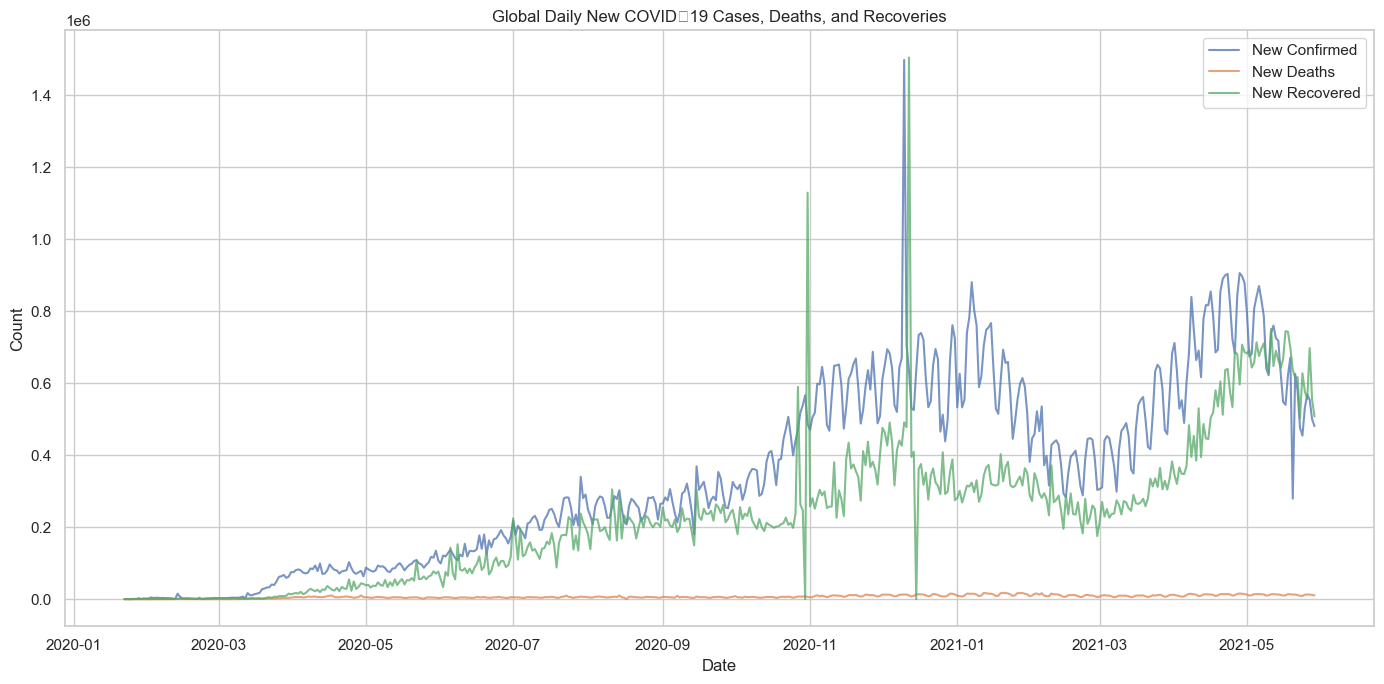

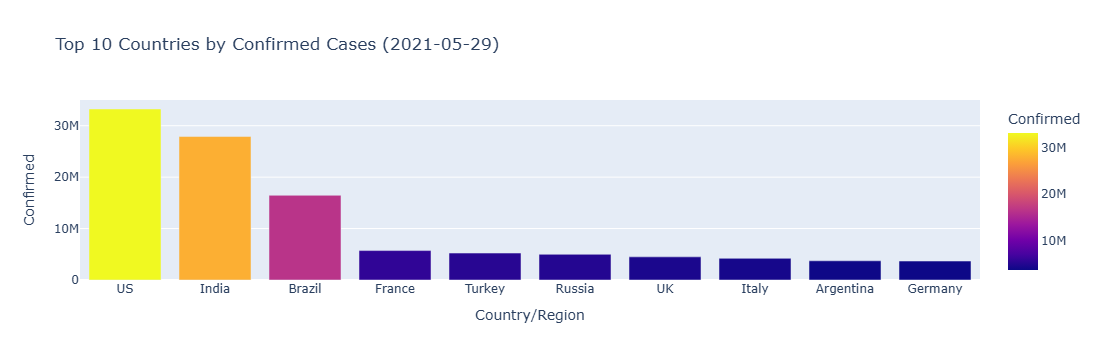

In [21]:
print("\n--- Analyzing 'covid_19_data.csv' ---")

df_covid_daily = pd.read_csv("covid_19_data.csv")
print("Successfully loaded 'covid_19_data.csv'")

display(df_covid_daily.head())
df_covid_daily.info()

df_covid_daily["ObservationDate"] = pd.to_datetime(df_covid_daily["ObservationDate"])
df_covid_daily[["Confirmed", "Deaths", "Recovered"]] = df_covid_daily[["Confirmed", "Deaths", "Recovered"]].fillna(0)

daily_summary = df_covid_daily.groupby("ObservationDate")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index().sort_values("ObservationDate")

for col in ["Confirmed", "Deaths", "Recovered"]:
    daily_summary[f"New_{col}"] = daily_summary[col].diff().fillna(0).clip(lower=0)

fig1 = px.line(
    daily_summary,
    x="ObservationDate",
    y=["Confirmed", "Deaths", "Recovered"],
    title="Global Cumulative COVID‑19 Cases Over Time",
    labels={"value": "Count", "ObservationDate": "Date"},
    hover_data={"ObservationDate": "|%Y‑%m‑%d"},
)
fig1.update_layout(hovermode="x unified", legend_title_text="Case Type")
fig1.show()

plt.figure(figsize=(14, 7))
plt.plot(daily_summary["ObservationDate"], daily_summary["New_Confirmed"], label="New Confirmed", alpha=0.75)
plt.plot(daily_summary["ObservationDate"], daily_summary["New_Deaths"], label="New Deaths", alpha=0.75)
plt.plot(daily_summary["ObservationDate"], daily_summary["New_Recovered"], label="New Recovered", alpha=0.75)
plt.title("Global Daily New COVID‑19 Cases, Deaths, and Recoveries")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

latest = df_covid_daily["ObservationDate"].max()
latest_df = df_covid_daily[df_covid_daily["ObservationDate"] == latest]
country_cases = latest_df.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(10).reset_index()

fig_country = px.bar(
    country_cases,
    x="Country/Region",
    y="Confirmed",
    title=f"Top 10 Countries by Confirmed Cases ({latest.date()})",
    color="Confirmed",
    color_continuous_scale=px.colors.sequential.Plasma,
)
fig_country.show()



--- Analyzing 'country_wise_latest.csv' ---
Successfully loaded 'country_wise_latest.csv'


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

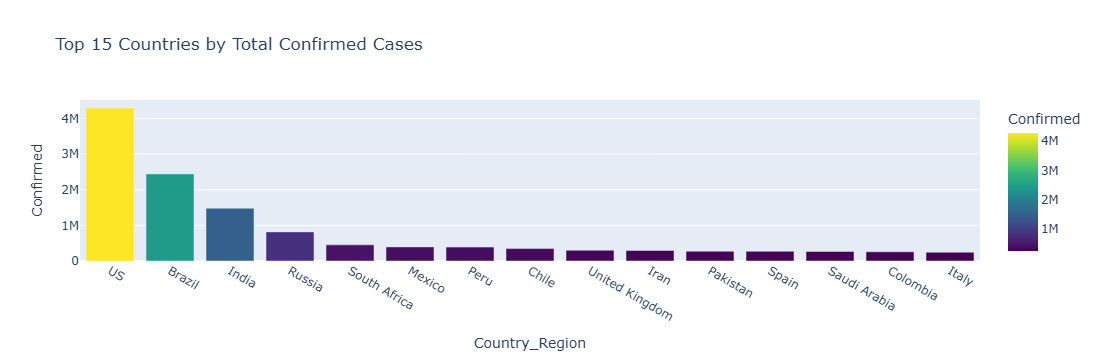

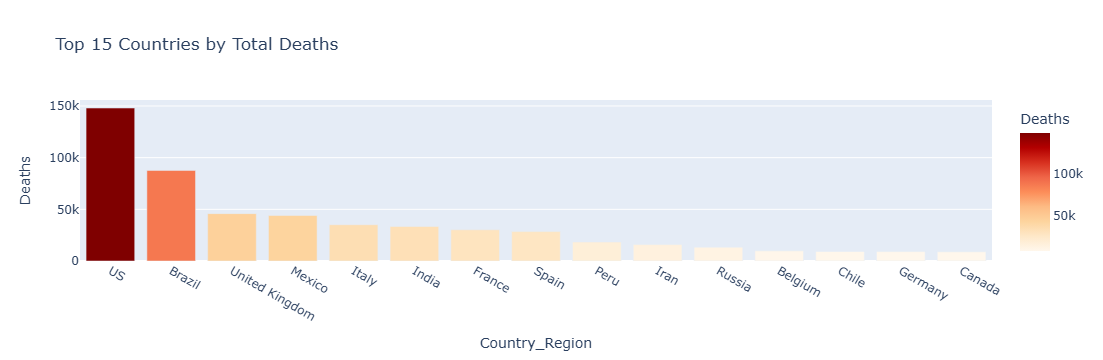

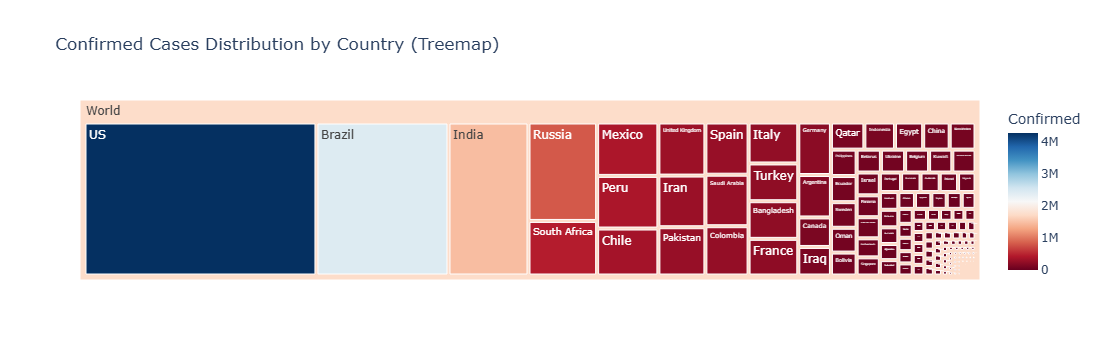

In [25]:
print("\n--- Analyzing 'country_wise_latest.csv' ---")

df_country_latest = pd.read_csv("country_wise_latest.csv")
print("Successfully loaded 'country_wise_latest.csv'")

display(df_country_latest.head())
df_country_latest.info()

df_country_latest.columns = df_country_latest.columns.str.strip().str.replace(" ", "_").str.replace("/", "_").str.replace(".", "", regex=False)
df_country_latest = df_country_latest.fillna(0)

if "Active" not in df_country_latest or df_country_latest["Active"].sum() == 0:
    df_country_latest["Active"] = (df_country_latest["Confirmed"] - df_country_latest["Deaths"] - df_country_latest["Recovered"]).clip(lower=0)

top_confirmed = df_country_latest.nlargest(15, "Confirmed")

fig2 = px.bar(
    top_confirmed,
    x="Country_Region",
    y="Confirmed",
    title="Top 15 Countries by Total Confirmed Cases",
    color="Confirmed",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig2.show()

top_deaths = df_country_latest.nlargest(15, "Deaths")

fig3 = px.bar(
    top_deaths,
    x="Country_Region",
    y="Deaths",
    title="Top 15 Countries by Total Deaths",
    color="Deaths",
    color_continuous_scale=px.colors.sequential.OrRd,
)
fig3.show()

fig4 = px.treemap(
    df_country_latest[df_country_latest["Confirmed"] > 0],
    path=[px.Constant("World"), "Country_Region"],
    values="Confirmed",
    color="Confirmed",
    hover_data=["Deaths", "Recovered", "Active"],
    color_continuous_scale="RdBu",
    title="Confirmed Cases Distribution by Country (Treemap)",
)
fig4.show()


In [39]:
df = pd.read_csv("2019_nC0v_20200121_20200126 - SUMMARY.csv", header=None)
pd.set_option('display.max_columns', None)
print(df.head(10))

                0               1                  2          3          4  \
0  Province/State         Country  Date last updated  Confirmed  Suspected   
1        Shanghai  Mainland China          1/21/2020          9         10   
2          Yunnan  Mainland China          1/21/2020          1        NaN   
3         Beijing  Mainland China          1/21/2020         10        NaN   
4          Taiwan  Mainland China          1/21/2020          1        NaN   
5           Jilin  Mainland China          1/21/2020        NaN          1   
6         Sichuan  Mainland China          1/21/2020          2          1   
7         Tianjin  Mainland China          1/21/2020          2        NaN   
8         Ningxia  Mainland China          1/21/2020        NaN          1   
9           Anhui  Mainland China          1/21/2020        NaN          3   

           5       6  
0  Recovered  Deaths  
1        NaN     NaN  
2        NaN     NaN  
3        NaN     NaN  
4        NaN     NaN  
5  


--- Analyzing '2019_nC0v_20200121_20200126 - SUMMARY.csv' ---


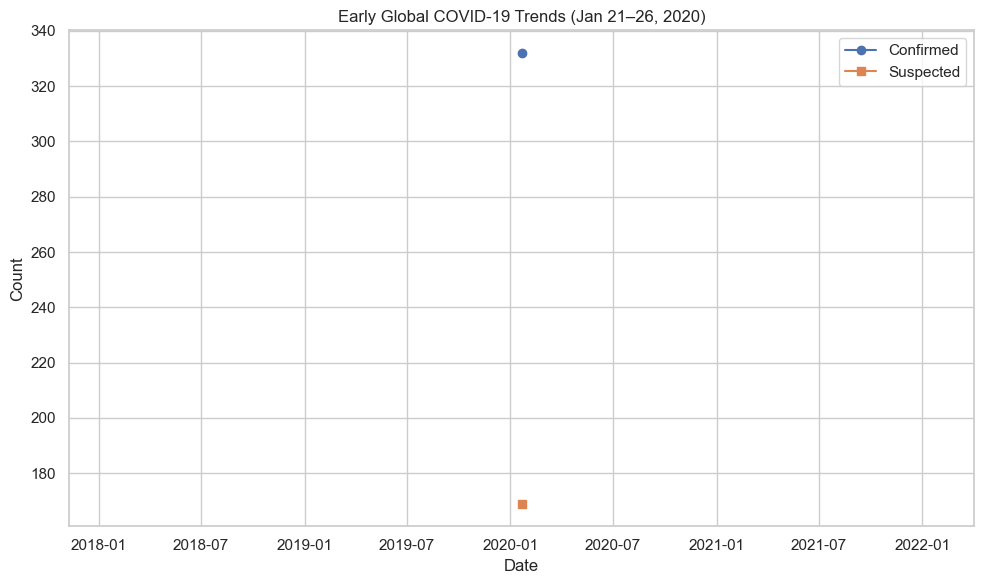

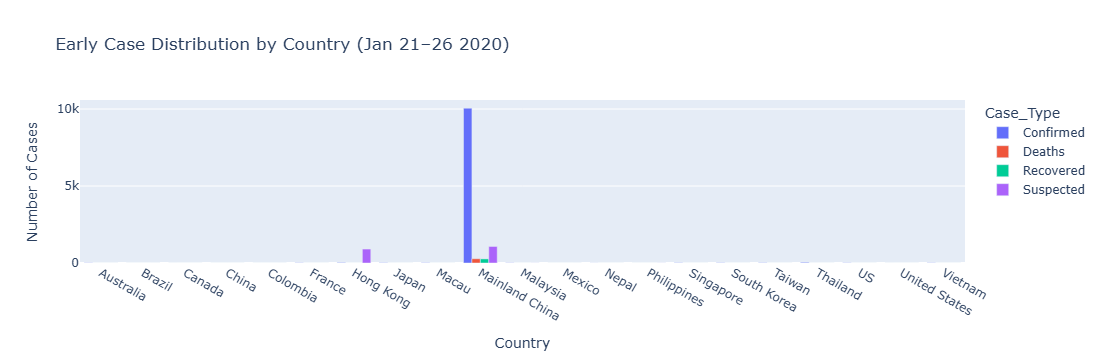

In [43]:
print("\n--- Analyzing '2019_nC0v_20200121_20200126 - SUMMARY.csv' ---")

df = pd.read_csv("2019_nC0v_20200121_20200126 - SUMMARY.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("/", "_")

df["Date_last_updated"] = pd.to_datetime(df["Date_last_updated"], format='%m/%d/%Y', errors='coerce')
df = df.dropna(subset=["Date_last_updated"])
df[["Confirmed", "Suspected"]] = df[["Confirmed", "Suspected"]].fillna(0).astype(int)

daily = df.groupby("Date_last_updated")[["Confirmed", "Suspected"]].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(daily["Date_last_updated"], daily["Confirmed"], label="Confirmed", marker="o")
plt.plot(daily["Date_last_updated"], daily["Suspected"], label="Suspected", marker="s")
plt.title("Early Global COVID-19 Trends (Jan 21–26, 2020)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



early_country = df_early.groupby("Country_Region")[["Confirmed", "Deaths", "Recovered", "Suspected"]].sum().reset_index()

melted = early_country.melt(id_vars="Country_Region", value_vars=["Confirmed", "Deaths", "Recovered", "Suspected"], var_name="Case_Type", value_name="Count")

fig_early_country = px.bar(
    melted,
    x="Country_Region",
    y="Count",
    color="Case_Type",
    barmode="group",
    title="Early Case Distribution by Country (Jan 21–26 2020)",
    labels={"Country_Region": "Country", "Count": "Number of Cases"},
)
fig_early_country.show()


In [45]:
print("\n--- COVID‑19 Data Analysis Complete ---")


--- COVID‑19 Data Analysis Complete ---
